In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read csv & test path
df = pd.read_csv('/content/loan_approval.csv')
df

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,N
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,N
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,N
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,N
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,3+,Graduate,NaN,4208300.0,Yes,35000000,180.0,NaN,Urban,N
610,Male,Yes,0,Graduate,Yes,4389700.0,Yes,12000000,360.0,1.0,Semiurban,Y
611,NaN,Yes,3+,Graduate,No,5176300.0,No,70000000,300.0,1.0,Urban,Y
612,Male,Yes,0,Graduate,NaN,6333700.0,No,49000000,180.0,1.0,Urban,Y


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,N
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,N
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,N
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,N
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,Y


In [ ]:
#Finding Blank Data
null_rows   = df.isnull().any()
nan_rows   = df.isna().any()
dash_rows = df.isin(['-']).any()

# null_rows
# nan_rows
dash_rows

,0
Gender,False
Married,True
Dependents,False
Education,False
Self_Employed,False
Income(dollar),False
Coapplicant,False
Loan_Amount,False
Term(month),False
loan_History,False


In [ ]:
# Drop Nan & Null & Dupe
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

null_rows   = df.isnull().any()
nan_rows   = df.isna().any()

# null_rows
# nan_rows

In [ ]:
df = df[df['Married'] != '-']
dash_rows = df.isin(['-']).any()

# dash_rows

In [ ]:
df.shape[0]

493

KNN

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,N
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,N
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,N
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,Y
5,Male,No,0,Not Graduate,No,200000.0,No,0,360.0,1.0,Urban,N


<Axes: xlabel='Income(M dollar)', ylabel='Loan Amount(M dollar)'>

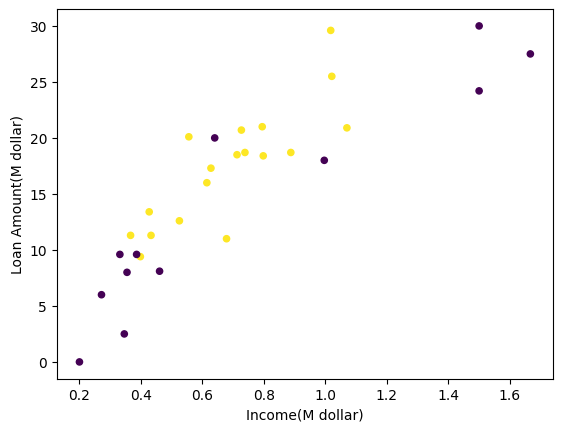

In [ ]:
#Make KNN is pick easier by sampling
df_sample = df.sample(n=30) # sample 30 records

interested = pd.DataFrame(
    {'Income(M dollar)': df_sample['Income(dollar)'],
     'Loan Amount(M dollar)': df_sample['Loan_Amount'],
      'Coapplicant': df_sample['Coapplicant'],
     })

#Map Data As Boolean
interested['Coapplicant'] = interested['Coapplicant'].map({'Yes': 1, 'No': 0})
#Scaling the Date
interested['Income(M dollar)']  = interested['Income(M dollar)'] / 1000000
interested['Loan Amount(M dollar)'] = interested['Loan Amount(M dollar)'] / 1000000

interested.plot(kind='scatter', x='Income(M dollar)', y='Loan Amount(M dollar)', c='Coapplicant', cmap=plt.cm.viridis, colorbar=False)

In [ ]:
#Create KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(interested[['Income(M dollar)', 'Loan Amount(M dollar)']], interested['Coapplicant']) #Fit ( Zip data, Group )
# ^
# |____ From here the data is can be zipped by { data = list(zip(fea1, fea2)) }
# data = fea1.iter().zip(fea2.iter())

KNeighborsClassifier()

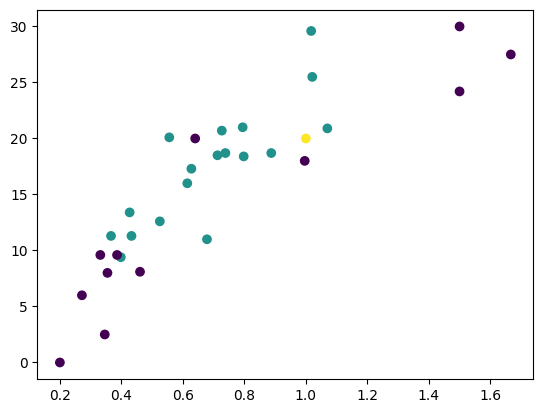

In [ ]:
#Try to add new data point
new_Income = 1.0
new_Amount = 20
new_point = [[new_Income, new_Amount]]

# Make .tolist() for append and classify it where -> pandas.core.series.Series <- Hashable type
plt.scatter(
    interested['Income(M dollar)'].tolist() + [new_Income],
    interested['Loan Amount(M dollar)'].tolist() + [new_Amount],
    c=interested['Coapplicant'].tolist() + [2], # Make new Classifier group to show new data
  )
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


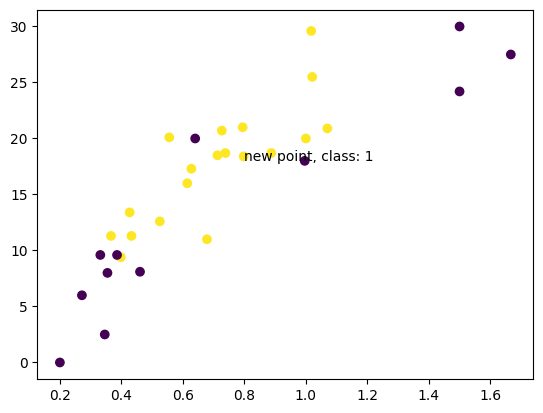

In [ ]:
# Make prediction of new_point <- [ [ 1.0, 20] ]
prediction = knn.predict(new_point)

plt.scatter(
    interested['Income(M dollar)'].tolist() + [new_Income],
    interested['Loan Amount(M dollar)'].tolist() + [new_Amount],
    c=interested['Coapplicant'].tolist() + [prediction[0]], # Add the prediction to group
  )

# Make a Text
plt.text(
    x=new_Income - 0.2,
    y=new_Amount - 2,
    s=f"new point, class: {prediction[0]}"
)

plt.show()
# From here the CoApplicant is 1 meant YES